## Ejemplos del método de Gramm-Schmidt

El proceso de ortogonalización de Gram–Schmidt es un algoritmo para construir, a partir de un conjunto de vectores de un espacio vectorial con producto interno, otro conjunto ortonormal de vectores que genere el mismo subespacio vectorial.

El método de Gram-Schmidt se usa para hallar bases ortogonales de cualquier base no euclídea.

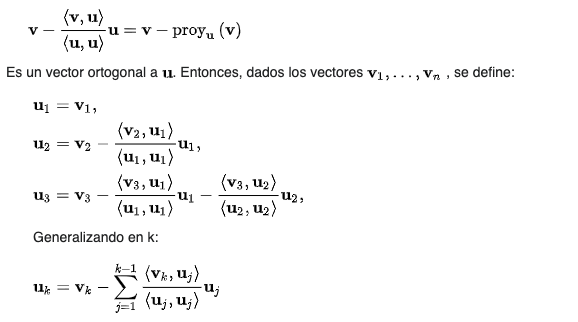

#### Ejemplo 1:

Sean $v_1$, $v_2$ y $v_3$ vectores en $R^3$ (con el producto interior definido) tales que:

<center>$v_1=(1,1,0)$, $v_2=(1,1,1)$ y $v_3=(1,0,1)$.</center>

Son linealmente independientes.

Entonces, lo siguiente es obtener la familia ortonormal de vectores $e_1$, $e_2$ y $e_3$ por medio del método de Gramm-Schmidt:

<center>$e_1=\frac{v_1}{||v_1||}=\frac{1}{\sqrt(2)}(1,1,0)$.</center>

Luego, considerando $z_2=v_2-<v_2,e_1>e_1$ dado que $e_2=\frac{z_2}{||z_2||}$, se tiene que:

<center>$z_2 = (1,1,1)-\left[(1,1,1).(\frac{1}{\sqrt(2)},\frac{1}{\sqrt(2)},0)\right](\frac{1}{\sqrt(2)},\frac{1}{\sqrt(2)},0)$</center>

<center>$z_2 = (1,1,1) - \frac{2}{\sqrt(2)}(\frac{1}{\sqrt(2)},\frac{1}{\sqrt(2)},0)$</center>

<center>$z_2 = (1,1,1) - (1,1,0) = (0,0,1)$</center>

Por lo tanto, 

<center>$e_2 = (0,0,1)$</center>

Finalmente, considerando $z_3=v_3-<v_3,e_1>e_1-v_2<v_2,e_2>e_2$ dado que $e_3=\frac{z_3}{||z_3||}$, se tiene que:

<center>$z_3 = (1,0,1) - (\frac{1}{2},\frac{1}{2},0)-(0,0,1)$</center>

<center>$z_3 = (\frac{1}{2},-\frac{1}{2},0)$</center>

Por lo tanto,

<center>$e_3 = (\frac{1}{\sqrt(2)},-\frac{1}{\sqrt(2)},0)$</center>

#### Ejemplo 2:

Sea $V$ el espacio de polinomios en $[0,1]$ con coeficientes reales de grado a lo más 2, con el producto interior definido como

<center>$<p,q>=\int_0^1p(x)q(x)dx$.</center>

Sean los polinomios $v_1 = 1$, $v_2 = 1 + x$ y $v_3 = 1 + x^2$ que son linealmente independientes. Entonces, encontrar los vectores ortonormales por el método de Gramm-Schmidt.

Dado que $||v_1||^2 = \int_0^1 1dx = 1$, entonces 

<center>$e_1 = \frac{v_1}{||v_1||} = 1$.</center>

Ahora, calculando $e_2$ a partir de $v_2$:

<center>$z_2= 1 + x - (x + \frac{1}{2}) = x - \frac{1}{2}$.</center>

Tomando

<center>$||z_2||^1 = \int_0^1\left(x - \frac{1}{2}\right)^2dx = \frac{1}{12}$</center>

Entoces

<center>$e_2 = \sqrt(12) \left(x - \frac{1}{2}\right)$</center>

Finalmente,

<center>$e_3 = 6\sqrt(5) \left(x^2 - x + \frac{1}{6}\right)$</center>

PROYECCIONES CALCULADAS DEL LIBRO "MATH FOR MACHINE LEARNING", PÁGINA 87.

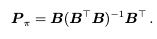

In [19]:
import numpy as np
from numpy.linalg import inv

def _from_basis_to_project_matrix(B):
    """Formula page 87 book 'Maths For ML' """
    inv_Bt_B = inv(np.dot(B.T, B))
    proj_matrix = np.dot(B, np.dot(inv_Bt_B, B.T))
    return proj_matrix

def _projec(x, basis):
    """project `x` in the new vector space defined by `basis` """
    proj_matrix = _from_basis_to_project_matrix(basis)
    proj_x = np.dot(proj_matrix, x)
    return proj_x

def _get_col(x, col_id):
    """return column `col_id` from matrix `x` """
    raw_col_val = x[:, col_id]
    col_as_row = np.array([raw_col_val]).T
    return col_as_row

def gram_schmidt(B):
    nb_col = B.shape[1]
    first_col=_get_col(B, 0)
    
    U_vecs = [first_col]
    
    for i in range(1, nb_col):
        B_i = _get_col(B, i)
        U_i_1 = np.concatenate(U_vecs, axis=1)
        p = _projec(B_i, U_i_1)
        U_i = B_i - p
        U_vecs.append(U_i)

    return U_vecs

if __name__ == '__main__':
    B = np.array([[1, 1, 0],
                  [1, 1, 1],
                  [1, 0, 1]
                  ])

    U = gram_schmidt(B)

    print(np.round(U, 2))

[[[ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 [[ 0.33]
  [ 0.33]
  [-0.67]]

 [[-0.5 ]
  [ 0.5 ]
  [ 0.  ]]]
